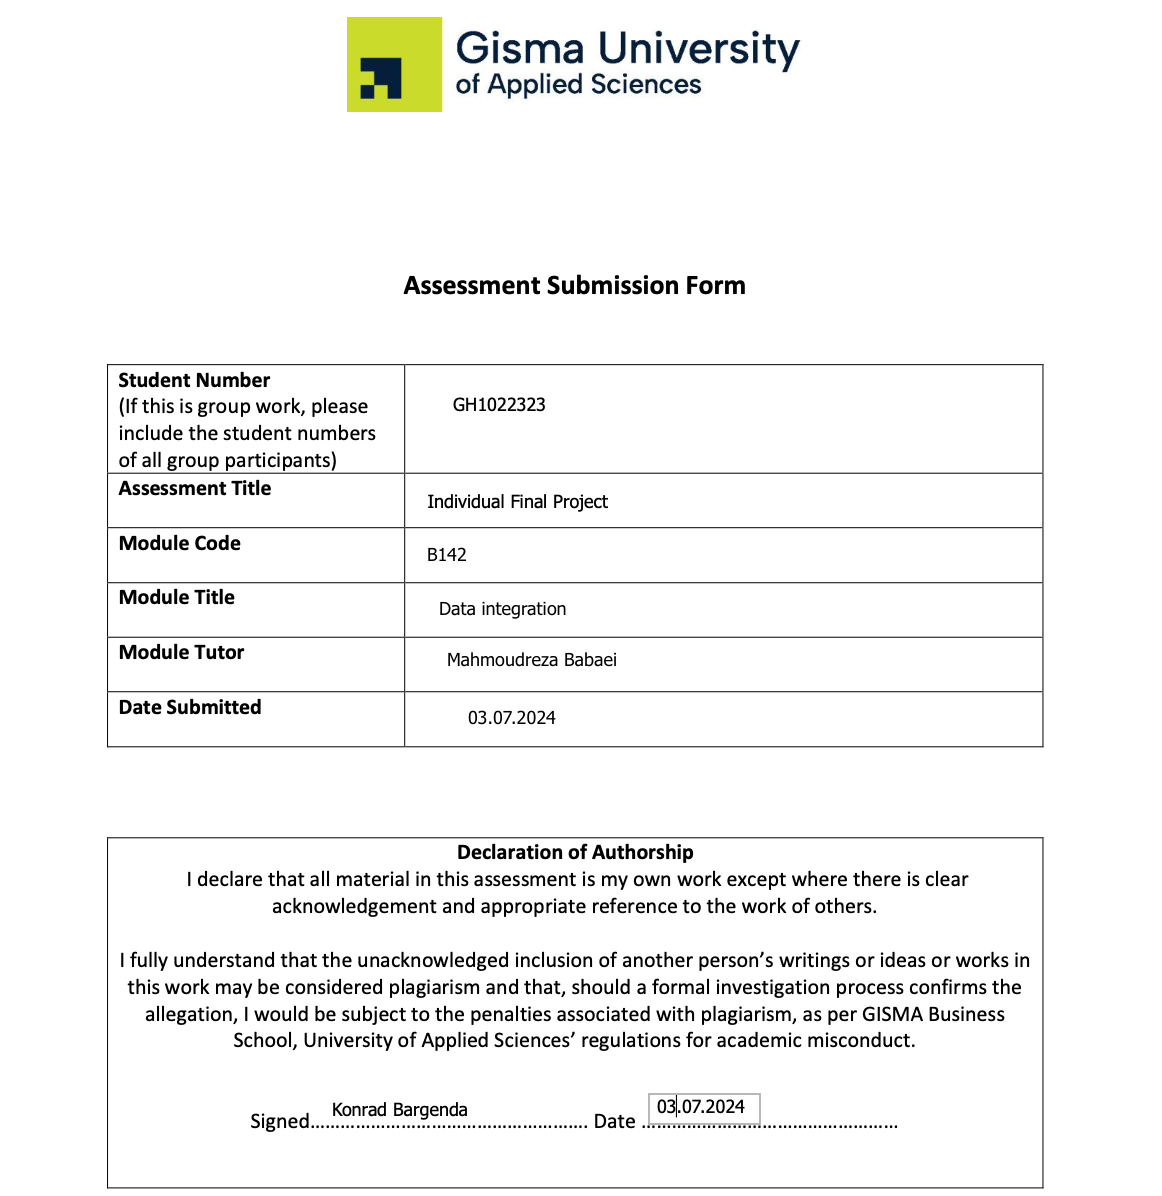

In this report I will be investigating what kind of factors influence valence of the song. In order to do that I obtained 3 data sets from spotify with different songs and performed data integration to put valuable data into one file which will help me in investigating what factors influence valence.
links for data sets:
https://www.kaggle.com/datasets/tonygordonjr/spotify-dataset-2023
https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset
https://www.kaggle.com/datasets/julianoorlandi/spotify-top-songs-and-audio-features

Link to github:

How diffrent factors impact Valence of the song on Spotify?

Importing files

In [2]:
from google.colab import files
f1 = files.upload()
f2 = files.upload()
f3 = files.upload()

#Importing Libraries

In [5]:
pip install pyspark


In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import csv
from collections import defaultdict
import multiprocessing
from pyspark.sql.functions import lit
from pyspark.sql.functions import col, when
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg
from sklearn.preprocessing import MinMaxScaler
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, sum as _sum



First of all I displayed data from each data set to make sure that they are similar and they can be integrated. To do that i used simple technique (display)


In [7]:
org_df1 = pd.read_csv("./dataset1.csv")

print("1st data set")

display(org_df1.head())

org_df2 = pd.read_csv("./dataset2.csv")

print("2nd data set")

display(org_df2.head())

org_df3 = pd.read_csv("./dataset3.csv")

print("3rd data set")

display(org_df3.head())

1st data set


,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube


2nd data set


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


3rd data set


,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507,30,301860377


Next step was to check if data sets contain any missing values and if there are some ways I can deal with it. Also i checked if there are any duplicated values that also need dealing with. In both situation i created functions. First one is about missing values. Is going through every data and if there is missing value is adding sum to what column it was missing from. Then I'm using this function to check it for every data set. Second function that works very similarly is going through every row and checking if data are duplicated.

In [8]:
def check_missing_values(data):
    missing_values = data.isnull().sum()
    if missing_values.sum() == 0:
        print("No missing values found.")
    else:
        print("Missing values found:")
        print(missing_values[missing_values > 0])

data = pd.read_csv("dataset1.csv")
print ("1sr data set")
check_missing_values(data)

data = pd.read_csv("dataset2.csv")
print ("2nd data set")
check_missing_values(data)

data = pd.read_csv("dataset3.csv")
print ("3rd data set")
check_missing_values(data)



1sr data set
Missing values found:
EnergyLiveness    2
dtype: int64
2nd data set
Missing values found:
artists       1
album_name    1
track_name    1
dtype: int64
3rd data set
No missing values found.


It

In [9]:
def check_duplicates(data):
    duplicates = data[data.duplicated()]
    if duplicates.empty:
        print("No duplicates found.")
    else:
        print("Duplicates found:")
        print(duplicates)

data = pd.read_csv("dataset1.csv")
print ("1sr data set")
check_duplicates(data)

data = pd.read_csv("dataset2.csv")
print ("2nd data set")
check_duplicates(data)

data = pd.read_csv("dataset3.csv")
print ("3rd data set")
check_duplicates(data)


1sr data set
No duplicates found.
2nd data set
No duplicates found.
3rd data set
No duplicates found.


After checking data sets for missing values i had to decide how i will cope with data that are missing. In the first data set only 2 data was missing and because the rest of the data in this row were inaccurate  because they had 0.0 in every category I decided to delete them since they have false data. I did the same for 2nd data set I decided to delete whole row since missing value is artists name, album name and track name which indicates that values in that row are also false.




In [10]:
file_path = 'dataset2.csv'
df = pd.read_csv(file_path)

df_cleaned = df.dropna()

cleaned_file_path = 'dataset2_cleaned.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

file_path = 'dataset1.csv'
df = pd.read_csv(file_path)

df_cleaned = df.dropna()

cleaned_file_path = 'dataset1_cleaned.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)


data = pd.read_csv("dataset1_cleaned.csv")
print ("1st data set")
check_missing_values(data)

data = pd.read_csv("dataset2_cleaned.csv")
print ("2nd data set")
check_missing_values(data)


1st data set
No missing values found.
2nd data set
No missing values found.


So after i had clean data i proceeded to normalize it in order to make it more in order which will be crucial for data management. To do that I created a function which is reading a .csv file then displaying the original data frame, and after that code is initializing the MinMax scaler. After that algorithm is identifying numerical columns which will be used for normalization and then normalizing it. All results of the normalization are saved to new files that will be used for further processes.

In [11]:
def normalize_dataset(input_csv, output_csv):
    df = pd.read_csv(input_csv)
    print(df.head())

    scaler = MinMaxScaler()

    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

    df_normalized = df.copy()
    df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

    print(f"\nNormalized for {input_csv}:")
    print(df_normalized.head())

    df_normalized.to_csv(output_csv, index=False)
    print(f"Normalized dataset saved to {output_csv}\n")

normalize_dataset('dataset1_cleaned.csv', 'dataset1_normalized.csv')
normalize_dataset('dataset2_cleaned.csv', 'dataset2_normalized.csv')
normalize_dataset('dataset3.csv', 'dataset3_normalized.csv')


     Artist                                          Track  \
0  Gorillaz                                 Feel Good Inc.   
1  Gorillaz                                Rhinestone Eyes   
2  Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3  Gorillaz                             On Melancholy Hill   
4  Gorillaz                                 Clint Eastwood   

                                           Album Album_type  Danceability  \
0                                     Demon Days      album         0.818   
1                                  Plastic Beach      album         0.676   
2  New Gold (feat. Tame Impala and Bootie Brown)     single         0.695   
3                                  Plastic Beach      album         0.689   
4                                       Gorillaz      album         0.663   

   Energy  Loudness  Speechiness  Acousticness  Instrumentalness  ...  \
0   0.705    -6.679       0.1770      0.008360          0.002330  ...   
1   0.703    -5.81

Next step to perform data integration is to prepare data with schema mapping. Which is mapping the fields or attributes of the dataset to the fields or attributes of the another  dataset. That way I can be sure that data types, formats and other properties are the same between data sets. To perform such an action I created a function that is going through 3 data sets and changing the name of the columns to names corresponding in another data set. Also like before I decided that the program will create new files with mapped data. That way I can easily use them in future and other processes.

In [12]:
def perform_schema_mapping(input_csv, output_csv):
    df = pd.read_csv(input_csv)
    print(f"Original DataFrame for {input_csv}:")
    print(df.head())

    if input_csv == 'dataset1.csv':
        df_mapped = df.rename(columns={
            'Artist': 'Artist',
            'Track': 'TrackName',
            'Album': 'AlbumName',
            'Album_type': 'AlbumType',
            'Danceability': 'Danceability',
            'Energy': 'Energy',
            'Loudness': 'Loudness',
            'Speechiness': 'Speechiness',
            'Acousticness': 'Acousticness',
            'Instrumentalness': 'Instrumentalness',
            'Liveness': 'Liveness',
            'Valence': 'Valence',
            'Tempo': 'Tempo',
            'Duration_min': 'DurationMin',
            'Title': 'Title',
            'Channel': 'Channel',
            'Views': 'Views',
            'Likes': 'Likes',
            'Comments': 'Comments',
            'Licensed': 'Licensed',
            'official_video': 'OfficialVideo',
            'Stream': 'Stream',
            'EnergyLiveness': 'EnergyLiveness',
            'most_playedon': 'MostPlayedOn'
        })
    elif input_csv == 'dataset2.csv':
        df_mapped = df.rename(columns={
            'track_id': 'TrackID',
            'artists': 'Artist',
            'album_name': 'AlbumName',
            'track_name': 'TrackName',
            'popularity': 'Popularity',
            'duration_ms': 'Duration_ms',
            'explicit': 'Explicit',
            'danceability': 'Danceability',
            'energy': 'Energy',
            'key': 'Key',
            'loudness': 'Loudness',
            'mode': 'Mode',
            'speechiness': 'Speechiness',
            'acousticness': 'Acousticness',
            'instrumentalness': 'Instrumentalness',
            'liveness': 'Liveness',
            'valence': 'Valence',
            'tempo': 'Tempo',
            'time_signature': 'TimeSignature',
            'track_genre': 'Genre'
        })
    elif input_csv == 'dataset3.csv':
        df_mapped = df.rename(columns={
            'id': 'TrackID',
            'artist_names': 'Artist',
            'track_name': 'TrackName',
            'source': 'Source',
            'key': 'Key',
            'mode': 'Mode',
            'time_signature': 'TimeSignature',
            'danceability': 'Danceability',
            'energy': 'Energy',
            'speechiness': 'Speechiness',
            'acousticness': 'Acousticness',
            'instrumentalness': 'Instrumentalness',
            'liveness': 'Liveness',
            'valence': 'Valence',
            'loudness': 'Loudness',
            'tempo': 'Tempo',
            'duration_ms': 'Duration_ms',
            'weeks_on_chart': 'WeeksOnChart',
            'streams': 'Streams'
        })
    else:
        print(f"Schema mapping not defined for {input_csv}. Skipping...")

    print(f"\nMapped DataFrame for {input_csv}:")
    print(df_mapped.head())

    df_mapped.to_csv(output_csv, index=False)
    print(f"Mapped dataset saved to {output_csv}\n")

perform_schema_mapping('dataset1.csv', 'dataset1_mapped.csv')
perform_schema_mapping('dataset2.csv', 'dataset2_mapped.csv')
perform_schema_mapping('dataset3.csv', 'dataset3_mapped.csv')


Original DataFrame for dataset1.csv:
     Artist                                          Track  \
0  Gorillaz                                 Feel Good Inc.   
1  Gorillaz                                Rhinestone Eyes   
2  Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3  Gorillaz                             On Melancholy Hill   
4  Gorillaz                                 Clint Eastwood   

                                           Album Album_type  Danceability  \
0                                     Demon Days      album         0.818   
1                                  Plastic Beach      album         0.676   
2  New Gold (feat. Tame Impala and Bootie Brown)     single         0.695   
3                                  Plastic Beach      album         0.689   
4                                       Gorillaz      album         0.663   

   Energy  Loudness  Speechiness  Acousticness  Instrumentalness  ...  \
0   0.705    -6.679       0.1770      0.008360        

In my project I will be using PySpark to perform data integration. In addition I will be using map reduce to make it. In order to parallelize the data integration process and make it much more efficient since there is a lot of data in data sets. To do that I started with initializing the SparkSession by using SparkSession.builder. Then I'm loading data sets with the first columns being a header, then with inferSchema its telling spark to automatically infer data sets. Then to make sure that mapping went correctly i checked each data set that they have common columns and after that program is only picking those that are common. Then code is adding a source column to identify the origin of each data set. To integrate data I used union. That way if i have a source column while doing map reduce my code is counting rows by source. Lastly integration is saved to a new file that I will use for analysis.

In [13]:
spark = SparkSession.builder \
    .appName("Spark with Map Reduce") \
    .getOrCreate()

dataset1_mapped = spark.read.option("header", "true").csv("dataset1_mapped.csv", inferSchema=True)
dataset2_mapped = spark.read.option("header", "true").csv("dataset2_mapped.csv", inferSchema=True)
dataset3_mapped = spark.read.option("header", "true").csv("dataset3_mapped.csv", inferSchema=True)

common_columns = list(set(dataset1_mapped.columns) & set(dataset2_mapped.columns) & set(dataset3_mapped.columns))

dataset1_mapped = dataset1_mapped.select(common_columns)
dataset2_mapped = dataset2_mapped.select(common_columns)
dataset3_mapped = dataset3_mapped.select(common_columns)

dataset1_mapped = dataset1_mapped.withColumn("source", lit("dataset1"))
dataset2_mapped = dataset2_mapped.withColumn("source", lit("dataset2"))
dataset3_mapped = dataset3_mapped.withColumn("source", lit("dataset3"))

combined_data = dataset1_mapped.union(dataset2_mapped).union(dataset3_mapped)

row_count_by_source = combined_data.groupBy("source").count()

combined_data.coalesce(1).write.csv('pyspark_data_combined.csv', header=True)

combined_data.show(5)

row_count_by_source.show()

spark.stop()


+--------------------+------+-------+----------------+-------+--------+--------+-----------+------------+------------+--------+--------+
|           TrackName|Energy|  Tempo|Instrumentalness|Valence|Liveness|Loudness|Speechiness|Danceability|Acousticness|  Artist|  source|
+--------------------+------+-------+----------------+-------+--------+--------+-----------+------------+------------+--------+--------+
|      Feel Good Inc.| 0.705|138.559|         0.00233|  0.772|   0.613|  -6.679|      0.177|       0.818|     0.00836|Gorillaz|dataset1|
|     Rhinestone Eyes| 0.703| 92.761|         6.87E-4|  0.852|  0.0463|  -5.815|     0.0302|       0.676|      0.0869|Gorillaz|dataset1|
|New Gold (feat. T...| 0.923|108.014|          0.0469|  0.551|   0.116|   -3.93|     0.0522|       0.695|      0.0425|Gorillaz|dataset1|
|  On Melancholy Hill| 0.739|120.423|           0.509|  0.578|   0.064|   -5.81|      0.026|       0.689|     1.51E-5|Gorillaz|dataset1|
|      Clint Eastwood| 0.694|167.953|    

After performing data integration it's important to do data analysis to make sure that the quality of the data is good and can be used for visualization. To make such an analysis I loaded pyspark combined data and displayed basic information about data. Then I checked for missing values to see if some values were removed while integration.

In [17]:
spark = SparkSession.builder \
    .appName("Exploratory Data Analysis") \
    .getOrCreate()

df = spark.read.option("header", "true").csv("pyspark_data_combined.csv", inferSchema=True)

print("Schema:")
df.printSchema()

print("\nNumber of rows:", df.count())
print("Number of columns:", len(df.columns))

print("\nSummary statistics:")
df.describe().show()

missing_counts = df.select([_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).toPandas().transpose()
missing_counts.columns = ['Missing Count']
print("\nMissing value counts:")
print(missing_counts)

numeric_cols = [col_name for col_name, col_type in df.dtypes if col_type in ['int', 'double']]
for col_name in numeric_cols:
    df = df.withColumn(col_name, when(df[col_name].cast("double").isNotNull(), df[col_name].cast("double")).otherwise(None))

correlation_matrix = df.select(numeric_cols).toPandas().corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

print("\nSample of cleaned DataFrame:")
df.show(25)

spark.stop()


Schema:
root
 |-- TrackName: string (nullable = true)
 |-- Energy: string (nullable = true)
 |-- Tempo: double (nullable = true)
 |-- Instrumentalness: string (nullable = true)
 |-- Valence: string (nullable = true)
 |-- Liveness: string (nullable = true)
 |-- Loudness: string (nullable = true)
 |-- Speechiness: string (nullable = true)
 |-- Danceability: string (nullable = true)
 |-- Acousticness: string (nullable = true)
 |-- Artist: string (nullable = true)
 |-- source: string (nullable = true)


Number of rows: 141107
Number of columns: 12

Summary statistics:
+-------+-------------+------------------+------------------+------------------+-------------------+-----------------+-------------------+------------------+------------------+------------------+-----------------+--------+
|summary|    TrackName|            Energy|             Tempo|  Instrumentalness|            Valence|         Liveness|           Loudness|       Speechiness|      Danceability|      Acousticness|           

The results of the analysis showed that only 2 data accidently were removed during integration but because those data wont impact data visualization i decided to ignore it.

I understand the data I needed to make some visualizations. I decided to make a simple bar graph that calculates average valence for artists and displays the top 10 of them. That way I can see if popularity of the artists also impacts valence.

<ipython-input-19-6ca6d718b49b>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


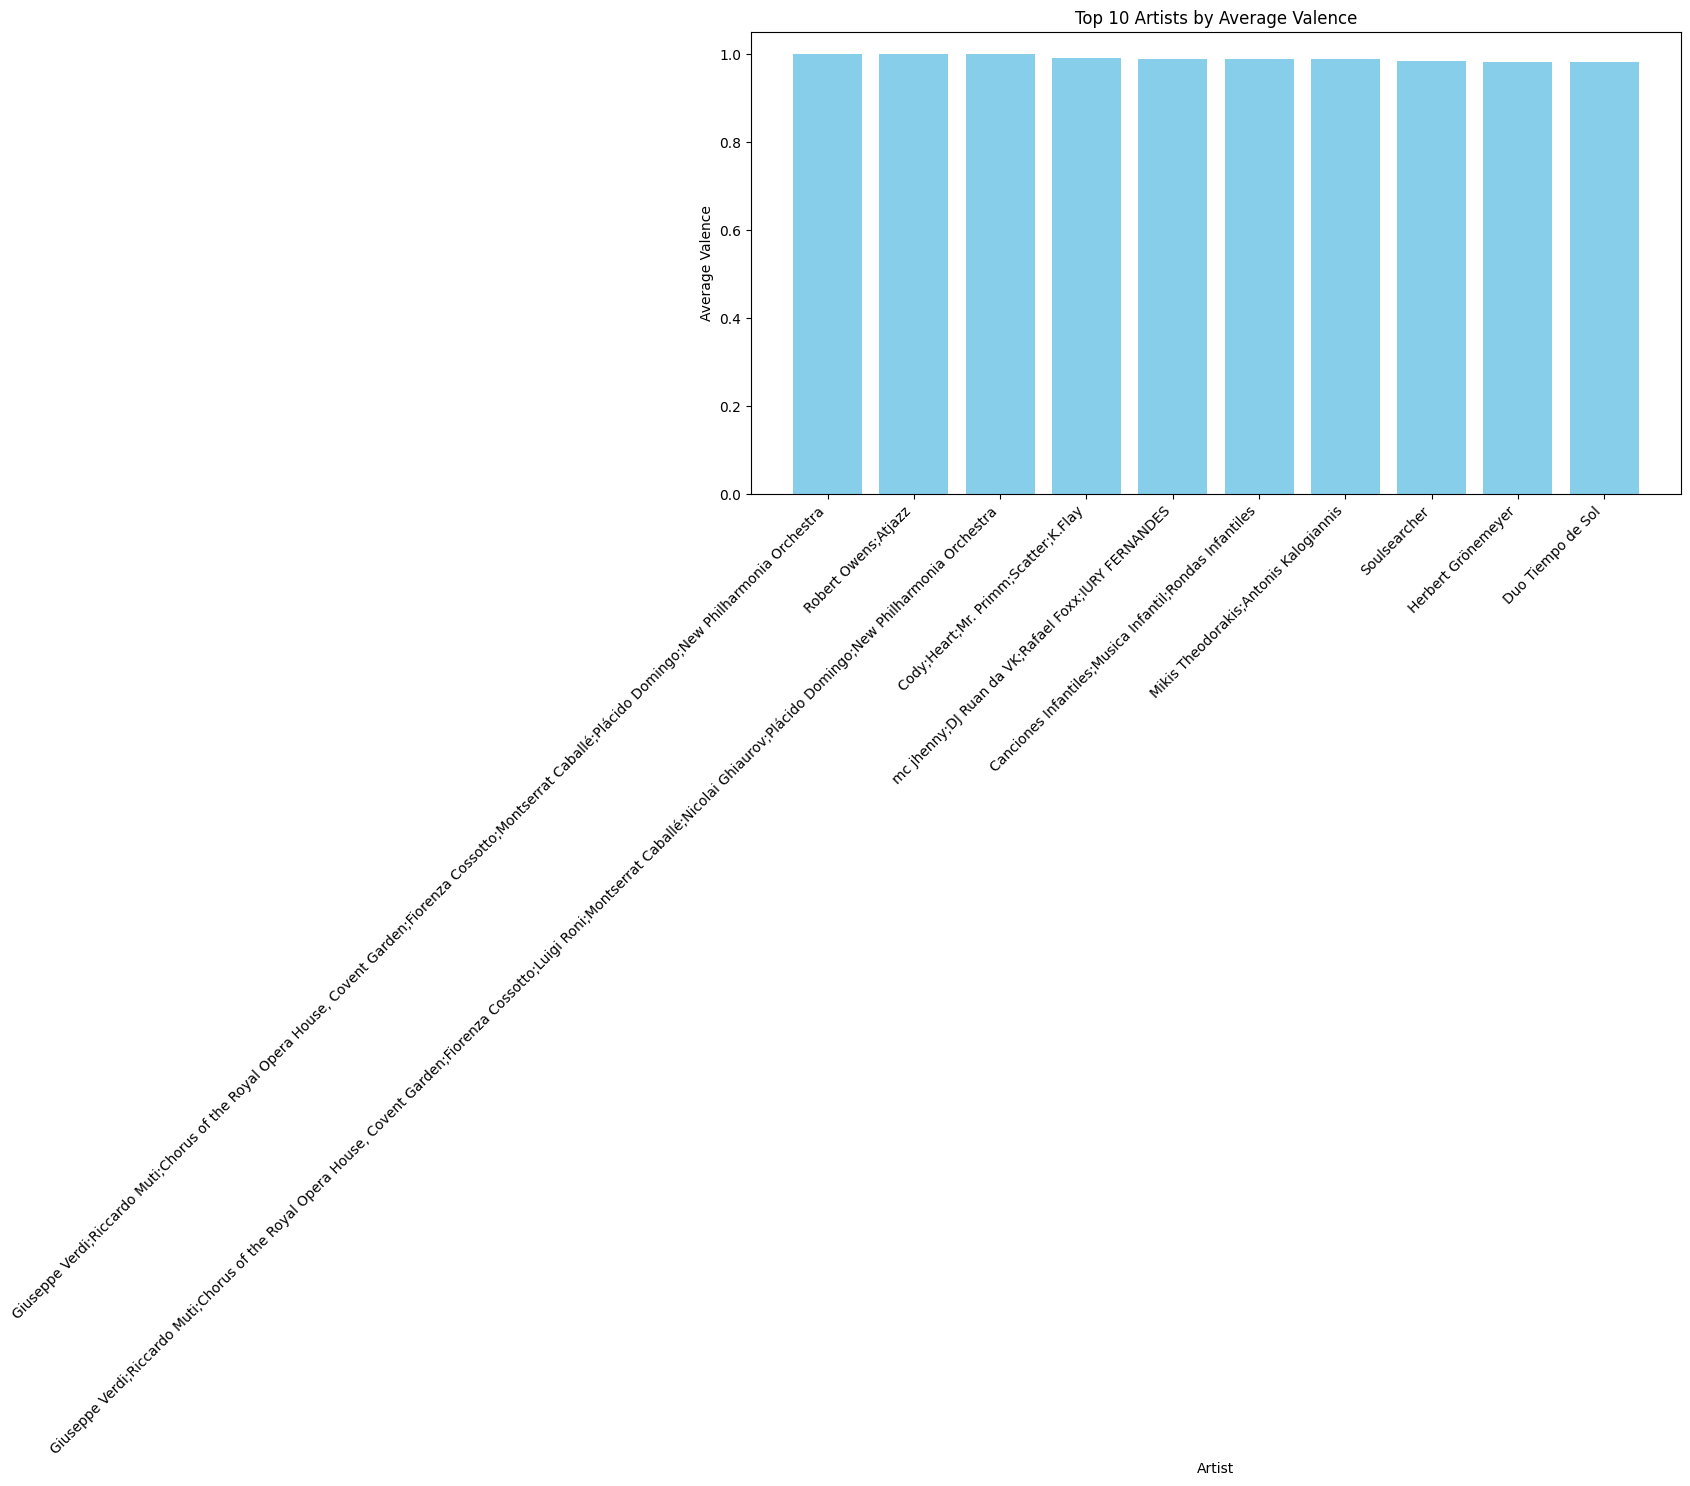

In [19]:
spark = SparkSession.builder \
    .appName("Top 10 Artists by Valence") \
    .getOrCreate()

file_path = "pyspark_data_combined.csv"
df = spark.read.option("header", "true").csv(file_path, inferSchema=True)

artist_valence = df.groupBy("Artist").agg(avg("Valence").alias("AvgValence"))

top_10_artists = artist_valence.orderBy(col("AvgValence").desc()).limit(10)

top_10_artists_df = top_10_artists.toPandas()

plt.figure(figsize=(12, 6))
plt.bar(top_10_artists_df['Artist'], top_10_artists_df['AvgValence'], color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Average Valence')
plt.title('Top 10 Artists by Average Valence')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

spark.stop()


Second visualization is about showing how songs from the same artist can have completely different valence. To do that I made 5 line graphs each for different artists. My code is choosing 5 artists by calculating the sum of their number of songs and the top 5 are shown.

<ipython-input-20-8e22ef88b778>:16: DtypeWarning: Columns (3,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip', quoting=csv.QUOTE_NONE)


Top 5 artists with more than 5 songs:
Artist
The Beatles      282
George Jones     269
Linkin Park      249
Stevie Wonder    248
BTS              232
Name: count, dtype: int64


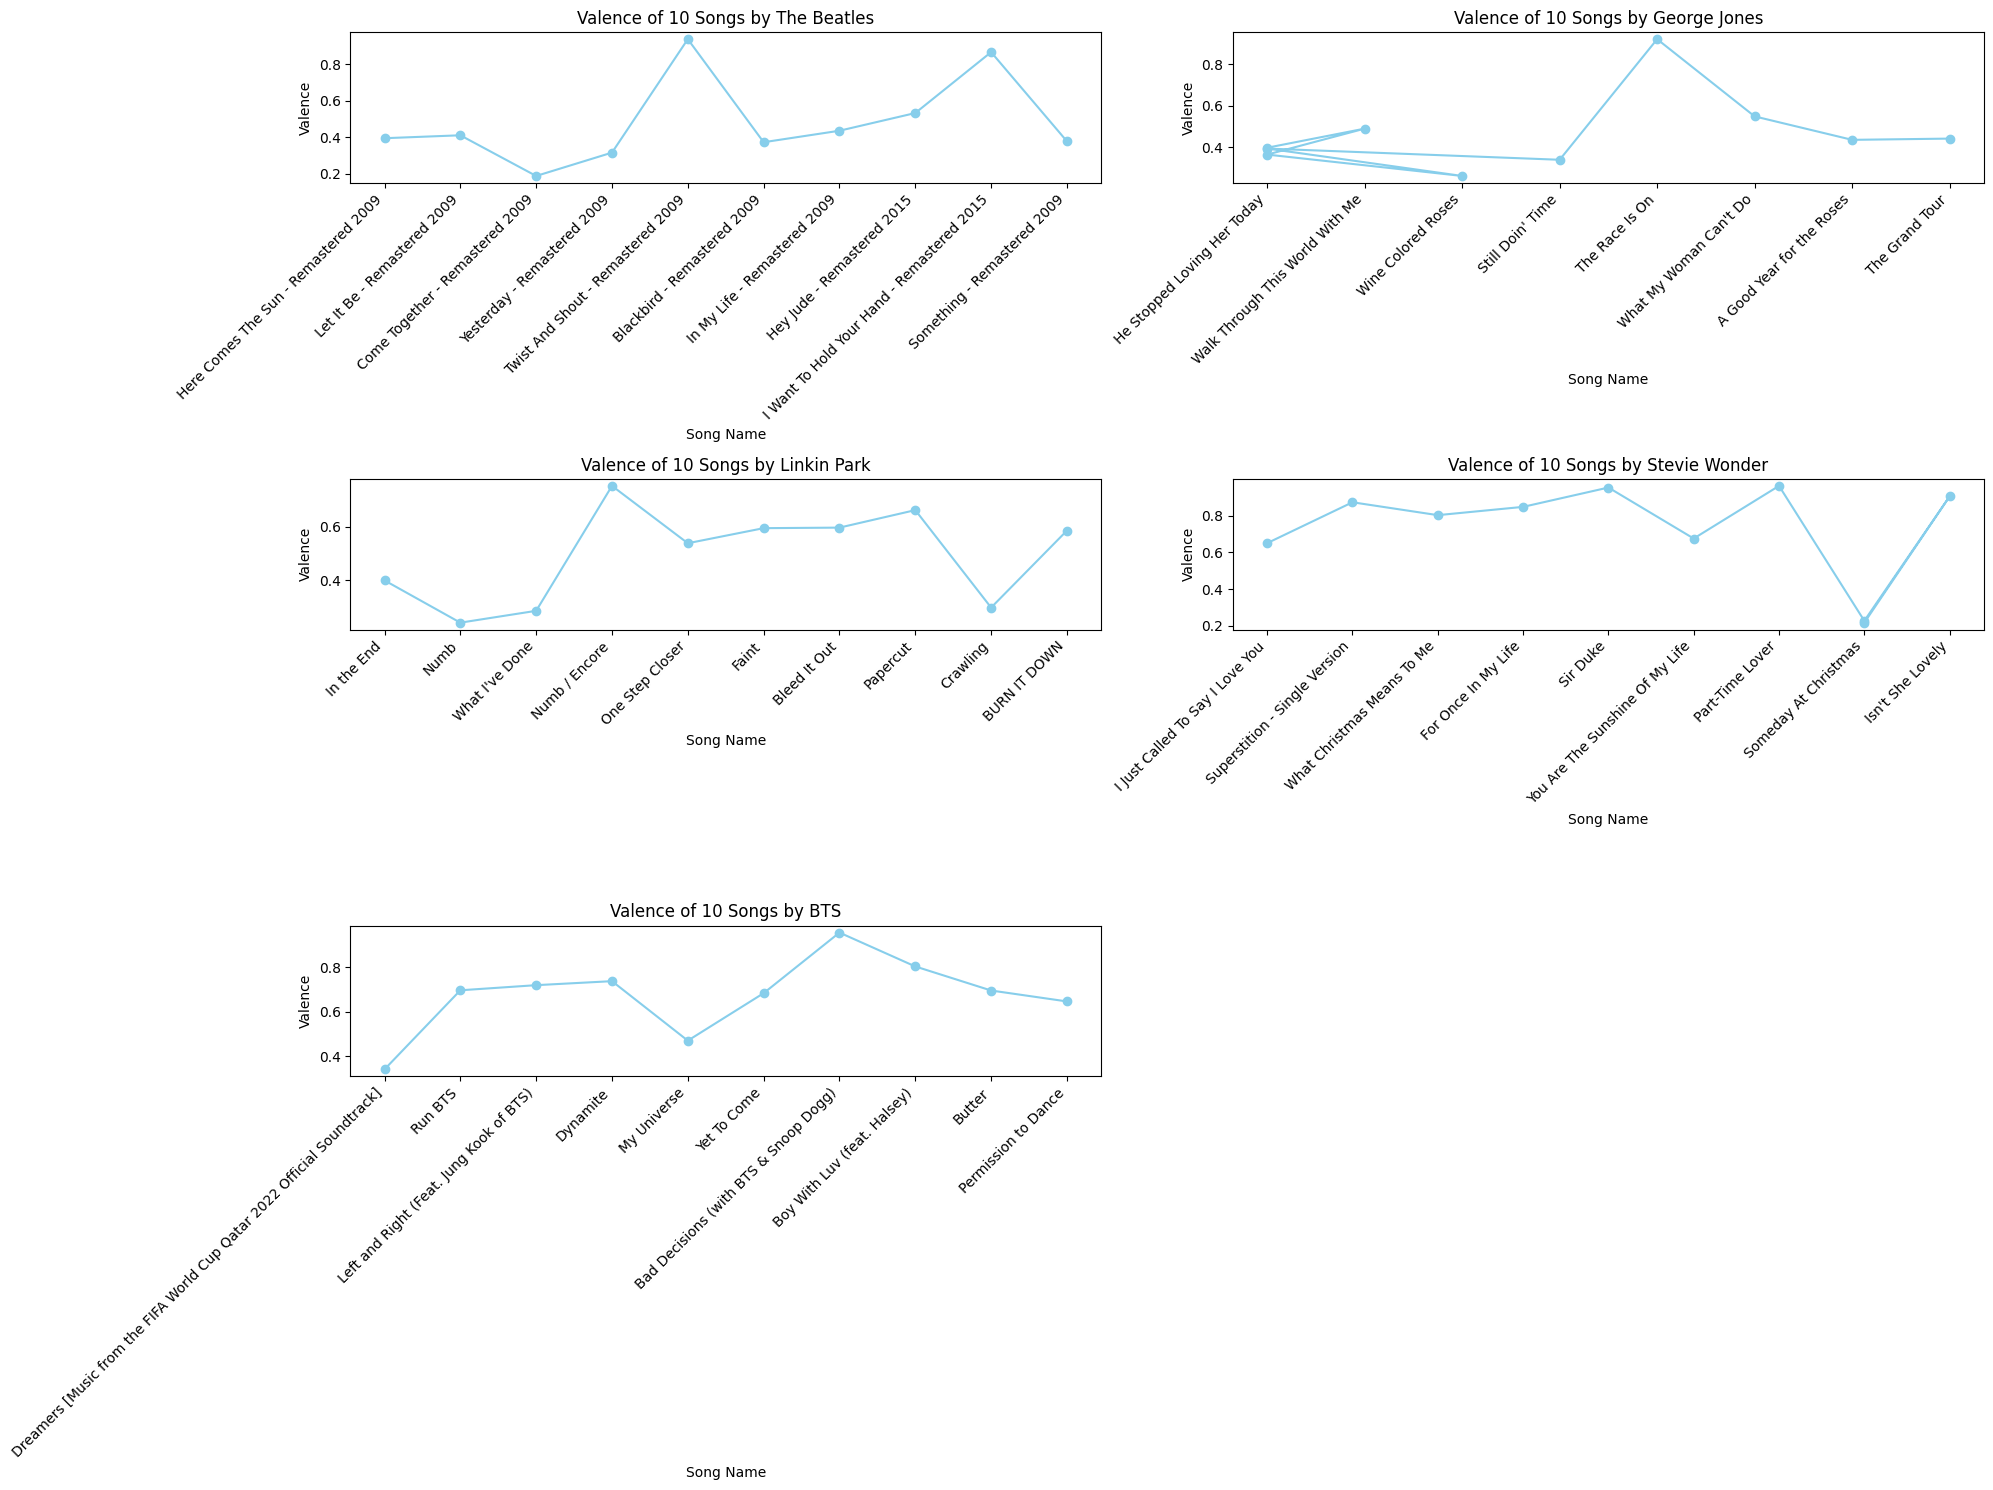

In [20]:
directory_path = 'pyspark_data_combined.csv'

file_path = None
for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            break

if file_path is None:
    raise FileNotFoundError("No CSV file found in the specified directory.")

df = pd.read_csv(file_path, on_bad_lines='skip', quoting=csv.QUOTE_NONE)

artist_song_counts = df['Artist'].value_counts()
artists_with_more_than_5_songs = artist_song_counts[artist_song_counts > 5].index.tolist()

top_5_artists = artist_song_counts[artist_song_counts > 5].head(5).index.tolist()

print("Top 5 artists with more than 5 songs:")
print(artist_song_counts[artist_song_counts > 5].head(5))

plt.figure(figsize=(20, 15))

for i, artist in enumerate(top_5_artists):
    artist_songs = df[df['Artist'] == artist].head(10).reset_index()

    plt.subplot(3, 2, i+1)
    plt.plot(artist_songs['TrackName'], artist_songs['Valence'], marker='o', linestyle='-', color='skyblue')
    plt.xlabel('Song Name')
    plt.ylabel('Valence')
    plt.title(f'Valence of 10 Songs by {artist}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()


Last visualization is about showing how factors influence valence of the song. To make this I wrote this algorithm. At the start its checking folder for .csv in which there are integrated data sets. Then the user can select which file. After the file is chosen the csv data is loaded and checked if all the columns are named correctly. After that its selecting relevant columns for that visualization. And because I had some missing values after integration this code is dropping those rows with missing values so there are no any mistakes. Then the program is picking two random songs with different valence. And plotting the bar graphs which will show the level of each category for what kind of valence.

Available CSV files:
1. part-00000-70c4e671-b3a2-4ed1-b715-38b5287cff5f-c000.csv
Select a file by number (1-1): 1


<ipython-input-29-92f4bec43572>:34: DtypeWarning: Columns (3,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, quoting=csv.QUOTE_NONE, on_bad_lines='skip')


Columns in the dataset: Index(['TrackName', 'Energy', 'Tempo', 'Instrumentalness', 'Valence',
       'Liveness', 'Loudness', 'Speechiness', 'Danceability', 'Acousticness',
       'Artist', 'source'],
      dtype='object')


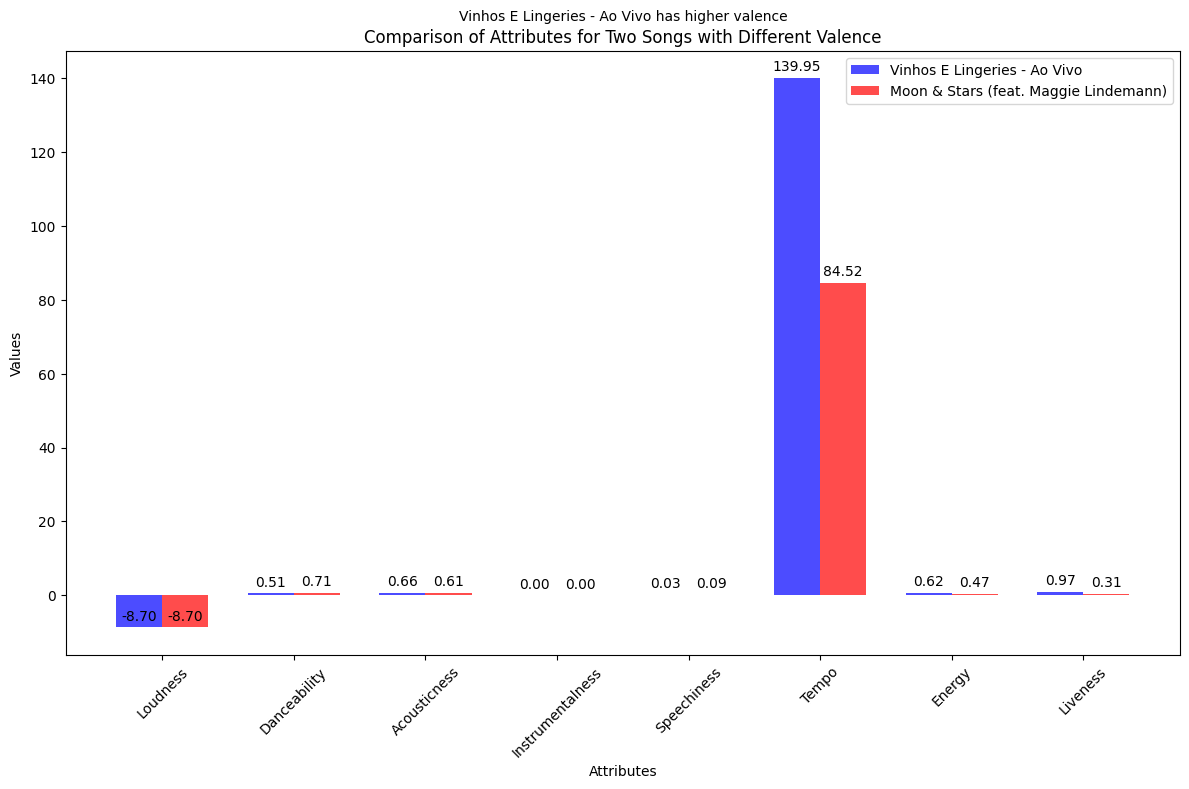

In [29]:
folder_path = 'pyspark_data_combined.csv'

if not os.path.isdir(folder_path):
    raise FileNotFoundError("The specified folder does not exist.")

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

if not csv_files:
    raise FileNotFoundError("No CSV files found in the specified folder.")

print("Available CSV files:")
for i, file in enumerate(csv_files, 1):
    print(f"{i}. {file}")

file_index = int(input(f"Select a file by number (1-{len(csv_files)}): ")) - 1

if file_index < 0 or file_index >= len(csv_files):
    raise ValueError("Invalid file number selected.")

file_path = os.path.join(folder_path, csv_files[file_index])

try:
    df = pd.read_csv(file_path, quoting=csv.QUOTE_NONE, on_bad_lines='skip')
except pd.errors.ParserError as e:
    print(f"Error parsing CSV file: {e}")

print("Columns in the dataset:", df.columns)

selected_columns = ['TrackName', 'Valence', 'Loudness', 'Danceability',
                    'Acousticness', 'Instrumentalness', 'Speechiness',
                    'Tempo', 'Energy', 'Liveness']

df = df[selected_columns].dropna()

for col in selected_columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

highest_valence_song = df.loc[df['Valence'].idxmax()]
lowest_valence_song = df.loc[df['Valence'].idxmin()]


songs = df['TrackName'].unique()
np.random.shuffle(songs)
song1 = df[df['TrackName'] == songs[0]].iloc[0]
song2 = df[df['TrackName'] == songs[1]].iloc[0]


if song1['Valence'] > song2['Valence']:
    higher_valence_song = song1
    lower_valence_song = song2
else:
    higher_valence_song = song2
    lower_valence_song = song1

attributes = ['Loudness', 'Danceability', 'Acousticness', 'Instrumentalness',
              'Speechiness', 'Tempo', 'Energy', 'Liveness']

num_attributes = len(attributes)
bar_width = 0.35
opacity = 0.7
colors = ['blue', 'red']

fig, ax = plt.subplots(figsize=(12, 8))

rects1 = ax.bar(np.arange(num_attributes), song1[attributes].values.astype(float), bar_width,
                alpha=opacity, color=colors[0], label=song1['TrackName'])
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

rects2 = ax.bar(np.arange(num_attributes) + bar_width, song2[attributes].values.astype(float), bar_width,
                alpha=opacity, color=colors[1], label=song2['TrackName'])
for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_xlabel('Attributes')
ax.set_ylabel('Values')
ax.set_title('Comparison of Attributes for Two Songs with Different Valence')
ax.set_xticks(np.arange(num_attributes) + bar_width / 2)
ax.set_xticklabels(attributes)
ax.legend()

ax.text(0.5, 1.05, f"{higher_valence_song['TrackName']} has higher valence",
        transform=ax.transAxes, ha='center')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In conclusion after performing data integration and doing detailed analysis. I came up with conclusion that in order for song to reach high valence it needs to have high values in 3 categories: Tempo, energy and liviness those factors are usually higher for songs i with higher valance which means that they have most impact on this subject. When it comes to integration, using map reduce for integration has been a huge efficiency boost for my algorithm because before using it my code would work for a couple minutes and now it can be done in 28 seconds which is a massive upgrade.